## Vehicle Insurance Claim Fraud Detection

Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,f1_score,precision_score

In [2]:
df = pd.read_csv("fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
pd.set_option('display.max_columns', None) # to display all thr coluns
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [4]:
#Used Columns
final_df = df[['Age',
 'WeekOfMonth',
 'Make',
 'DayOfWeekClaimed',
 'WeekOfMonthClaimed',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'BasePolicy',
   'FraudFound_P']]

In [5]:
final_df[final_df['FraudFound_P'] ==1].head(10)

,Age,WeekOfMonth,Make,DayOfWeekClaimed,WeekOfMonthClaimed,Fault,PolicyType,VehicleCategory,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,BasePolicy,FraudFound_P
28,0,1,Honda,Tuesday,4,Policy Holder,Sedan - All Perils,Sedan,more than 69000,none,new,16 to 17,none,All Perils,1
52,21,3,Honda,Wednesday,4,Policy Holder,Sport - Collision,Sport,more than 69000,none,4 years,26 to 30,3 to 5,Collision,1
53,50,4,Honda,Wednesday,2,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,none,more than 7,41 to 50,3 to 5,Collision,1
94,34,2,Honda,Friday,3,Policy Holder,Sport - Collision,Sport,more than 69000,none,7 years,31 to 35,3 to 5,Collision,1
96,38,2,Toyota,Tuesday,1,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,7 years,36 to 40,none,Collision,1
100,31,3,Chevrolet,Wednesday,2,Policy Holder,Utility - All Perils,Utility,more than 69000,more than 4,7 years,31 to 35,more than 5,All Perils,1
113,56,4,Accura,Tuesday,2,Policy Holder,Utility - All Perils,Utility,more than 69000,none,more than 7,51 to 65,none,All Perils,1
118,68,5,Mazda,Wednesday,1,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,2 to 4,5 years,over 65,none,All Perils,1
119,0,1,Honda,Friday,3,Policy Holder,Sedan - All Perils,Sedan,more than 69000,none,new,16 to 17,none,All Perils,1
147,39,1,Toyota,Tuesday,3,Policy Holder,Sedan - All Perils,Sedan,30000 to 39000,none,more than 7,36 to 40,more than 5,All Perils,1


# **Data Dictionary (at first glance)**
Results of printing the unique values from each feature. Things I noticed about each feature.
1. **Month** - object
    * contains 3 letter abbreviations for the months of the year
    * Are these the months in which the accident occured?
2. **WeekOfMonth** - int64
    * provides the week in the month the accident occured?
3. **DayOfWeek** - object
    * contains days of the week - are these the days of the week the accident occured on?
4. **Make** - object
    * contains a list of 19 car manufacturers
5. **AccidentArea** - object
    * classifies area for accident as "Urban" or "Rural"
6. **DayOfWeekClaimed** - object
    * contains the day of the week the claim was filed
    * also contains '0' - need to check how many of these there are and see about "fixing" - missing data?
7. **MonthClaimed** - object
    * contains 3 letter abbreviations for the months of the year
    * contains '0' - need to check how many there are and what they mean - missing data?
8. **WeekOfMonthClaimed** - int64
    * contains weeks in the month that the claimed in filed
9. **Sex** - object
    * gender of individual making claim?
    * binary data, convert to 1 or 0
10. **MaritalStatus** - object
    * marital status of individual making claim?
11. **Age** - int64
    * ages of individual making claim?
    * there is at least one individual with age 0 - missing data?
12. **Fault** - object
    * categorization of who was deemed at fault.
    * convert to binary, 1 or 0
13. **PolicyType** - object
    * contains two pieces of info -
        * the type of insurance on the car - liability, all perils, collision
        * category of the vehicle - sport, sedan, utility
14. **VehicleCategory** - object
    * contains the categorization of the vehicle (see PolicyType)
15. **VehiclePrice** - object
    * contains ranges for the value of the vehicle
    * replace ranges with mean value of range and convert to float
16. **FraudFound_P** - int64
    * indicats whether the claim was fraudulant (1) or not (0)
    * **this is what we want to predict**
17. **PolicyNumber** - int64
    * the masked policy number, appears to be the same as row number minus 1
18. **RepNumber** - int64
    * rep number is  integer from 1 - 16
19. **Deductible** - int64
    * the deductible amount
    * integer values
20. **DriverRating** - int64
    * the scale is 1, 2, 3, 4
    * the name DriverRating implies the data is ordinal, but is it interval as well?
21. **Days_Policy_Accident** - object
    * as a guess, this is the number of days between when the policy was purchased and the accident occured
    * each value is again a range of values
    * change these to be mean of the range and make float
22. **Days_Policy_Claim** - object
    * another guess, this is the number of days that pass between the policy was purchased and the claim was filed
    * each value is a range
    * change these to be the mean of the ranges and make float
23. **PastNumberOfClaims** - object
    * previous number of claims filed by policy holder (or claimant?)
24. **AgeOfVehicle** - object
    * represents age of vehicle at time of the accident?
    * each value is a range of years
    * change these to be the mean of the ranges and make float
25. **AgeOfPolicyHolder** - object
    * each value is a range of ages"
    * change these to be the mean of the ranges and make float
26. **PoliceReportFiled** - object
    * indicates whether a police report was filed for the accident
    * convert to binary
27. **WitnessPresent** - object
    * indicted whether a witness was present
    * conver to binary
28. **AgentType** -  object
    * this classifies an agent who is handling the claim as internal vs external
    * what does this mean?
    * change to binary
29. **NumberOfSuppliments** - object
    * probably not the number of vitamins taken daily
    * not sure what a suppliment is in insurance
30. **AddressChange_Claim** - object
    * guess, time from claim was filled to when person moved (i.e. filed an address change)
    * replace each interval with mean value of range
31. **NumberOfCars** - object
    * guess, number of cars involved in accident OR number of cars covered under policy
    * replace each interval with mean value of range
32. **Year** - int64
    * guess, year accident occured
33. **BasePolicy** - object
    * type of insurance coverage (see PolicyType)

## Step1.  EDA

In [6]:
df.shape 

(15420, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [8]:
#dropping Policy Number column as it has no impact
df.drop(['PolicyNumber'],axis =1,inplace=True)

### Unique Values

In [9]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

Month
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

WeekOfMonth
[5 3 2 4 1]

DayOfWeek
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Make
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

AccidentArea
['Urban' 'Rural']

DayOfWeekClaimed
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

MonthClaimed
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

WeekOfMonthClaimed
[1 4 2 3 5]

Sex
['Female' 'Male']

MaritalStatus
['Single' 'Married' 'Widow' 'Divorced']

Age
[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]

Fault
['Policy Holder' 'Third Party']

PolicyType
['Sport - Liability' 'Sport - Collision' 'Sedan -

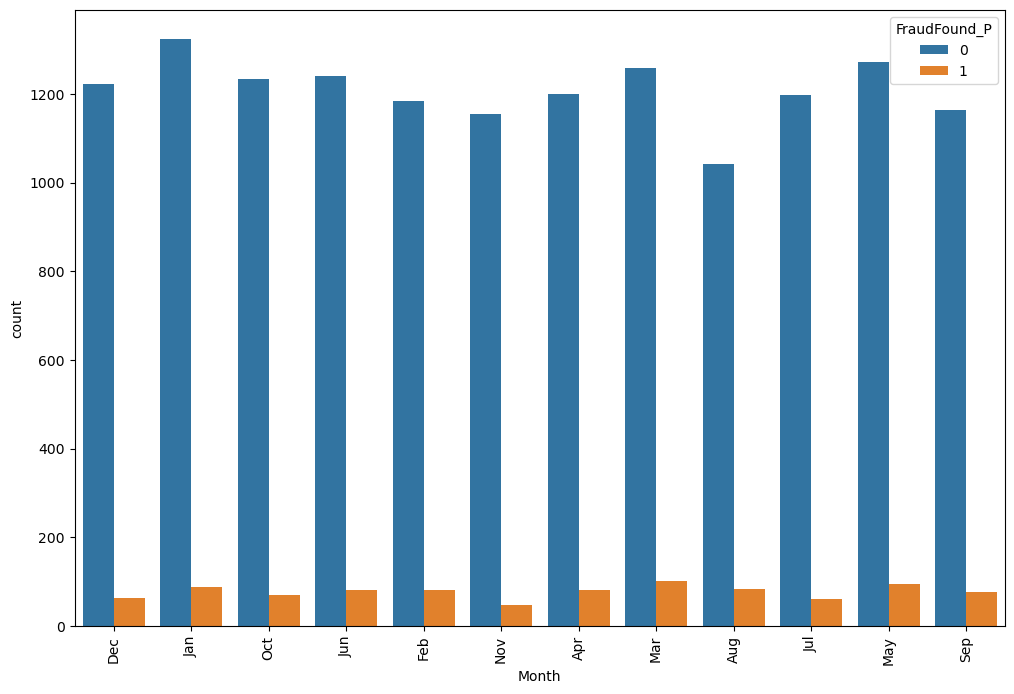

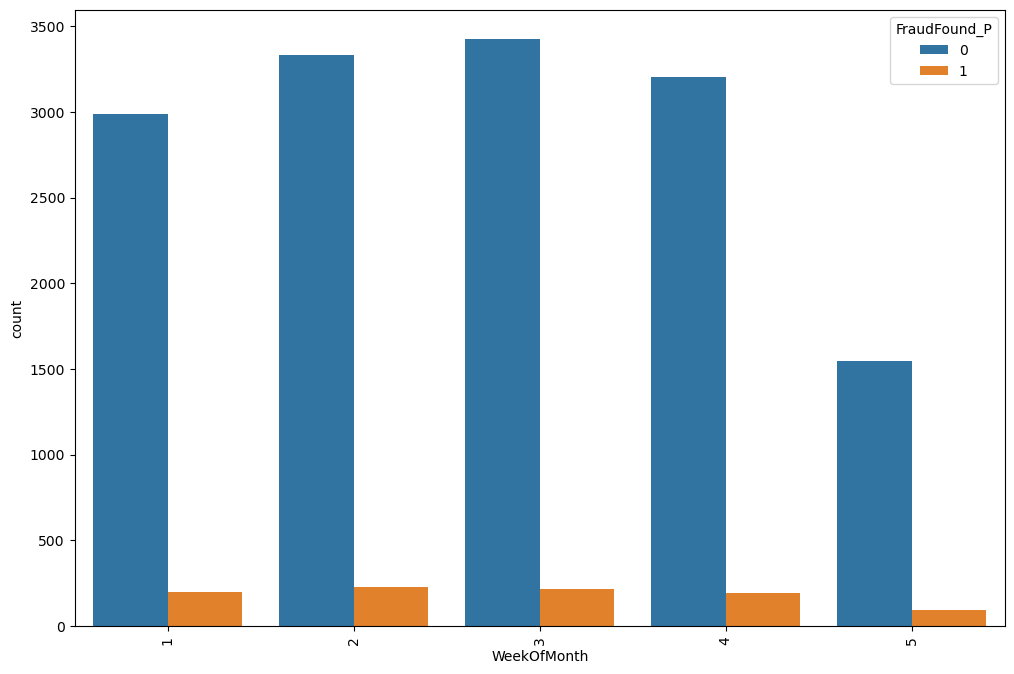

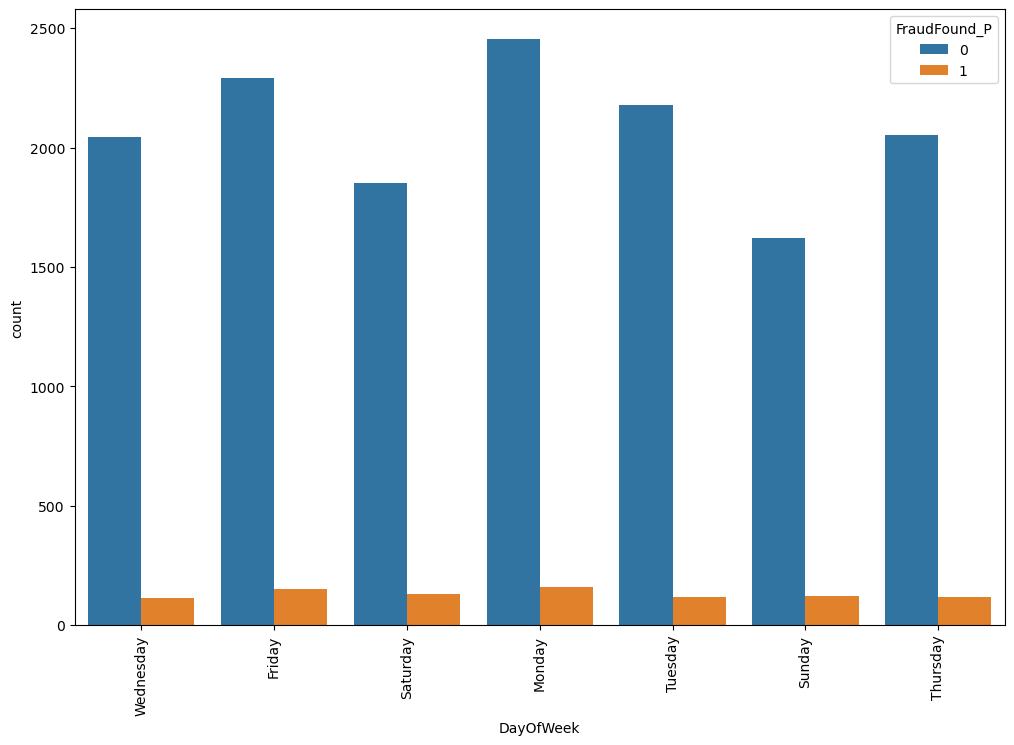

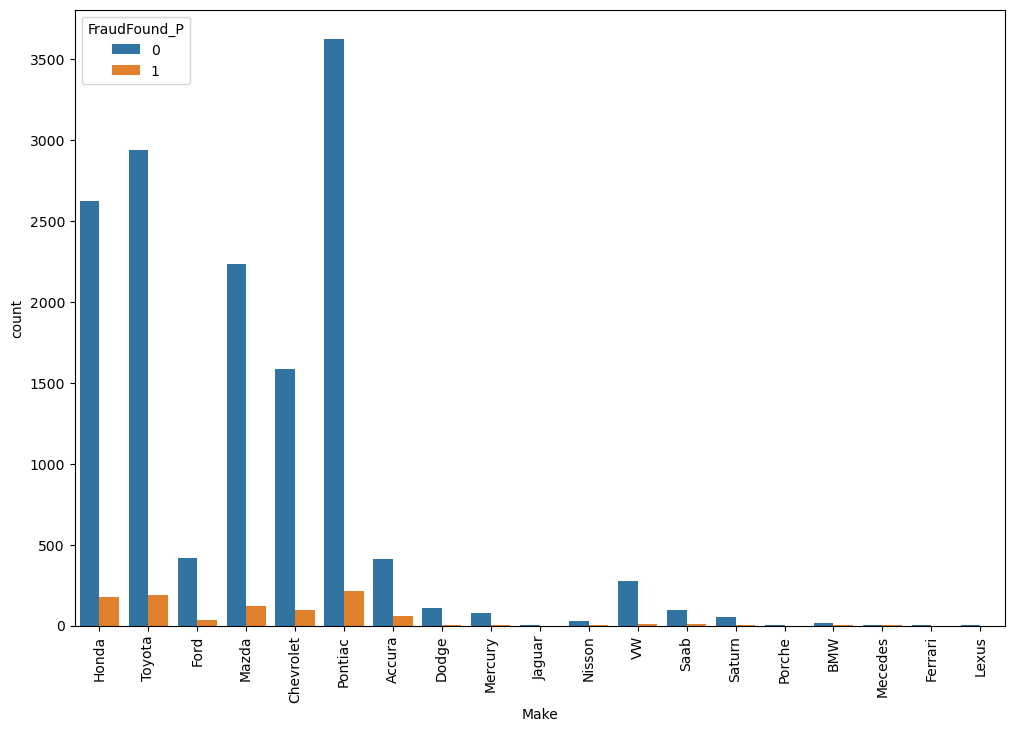

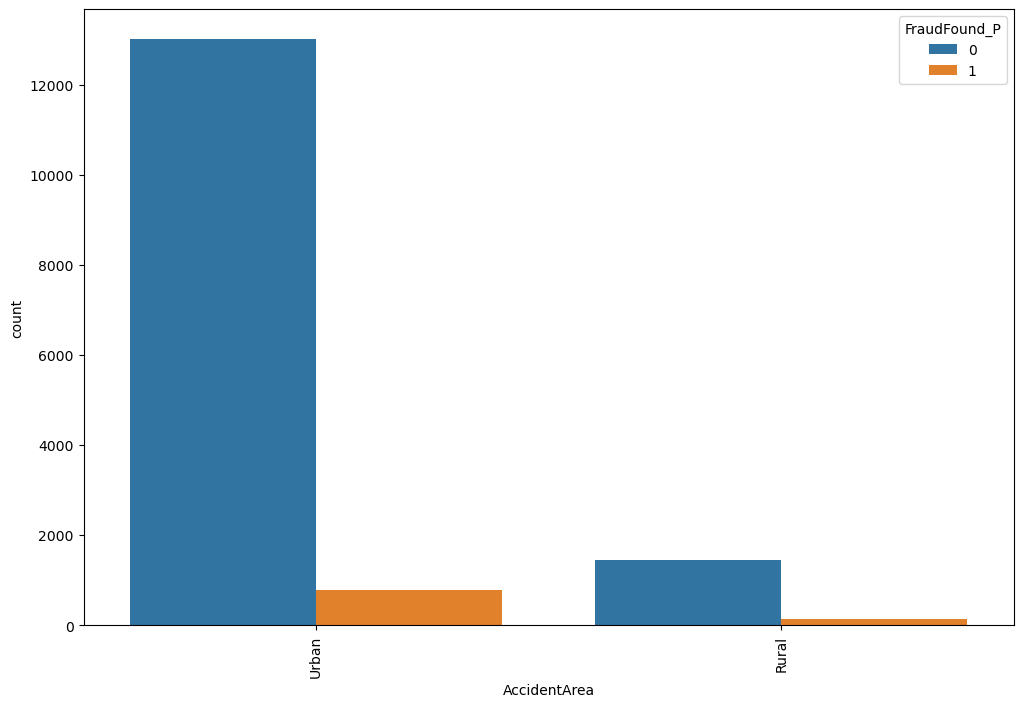

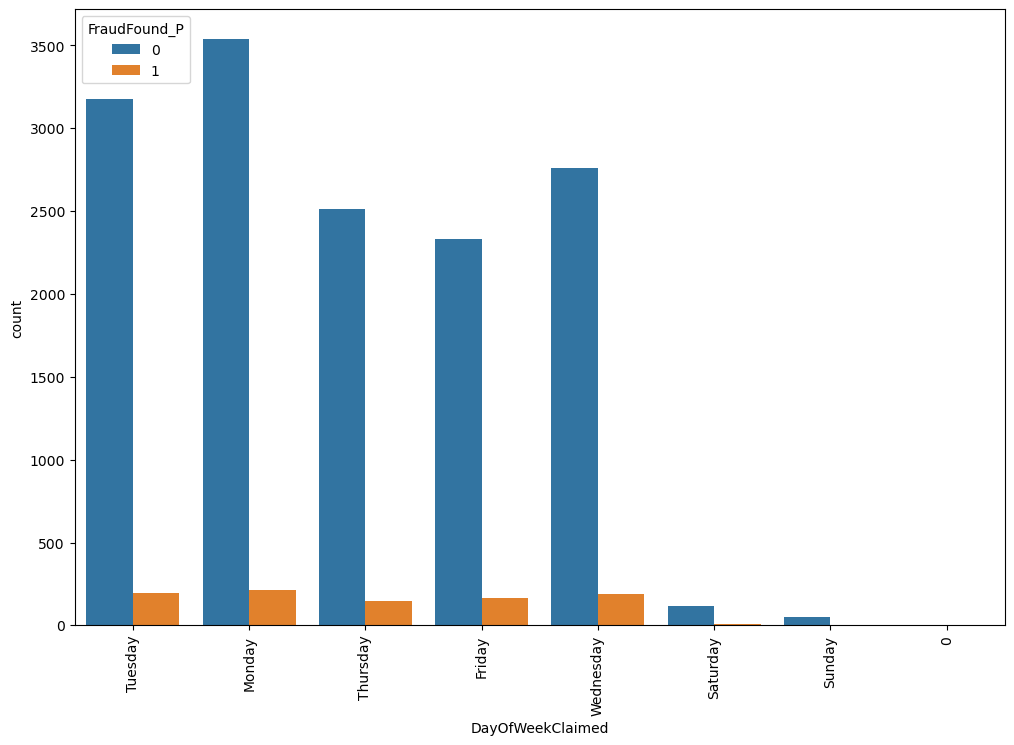

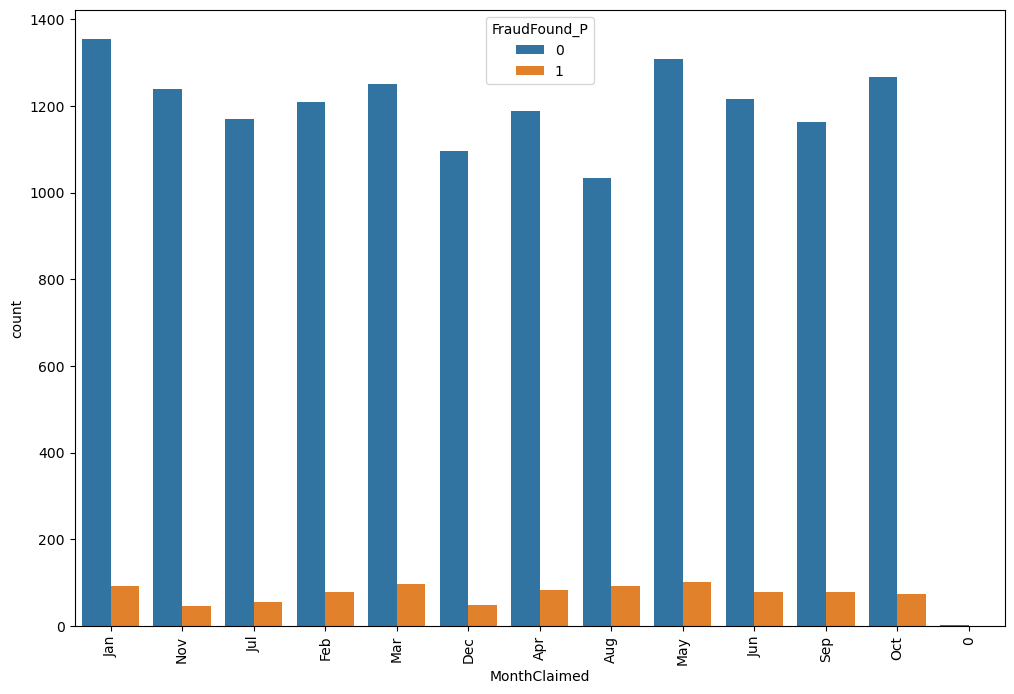

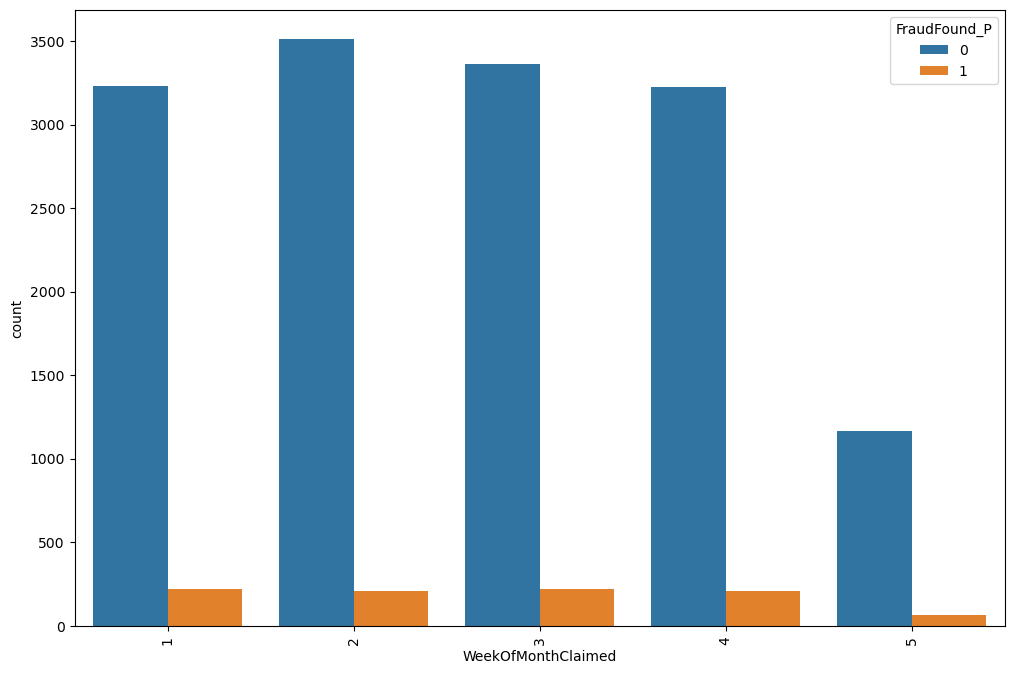

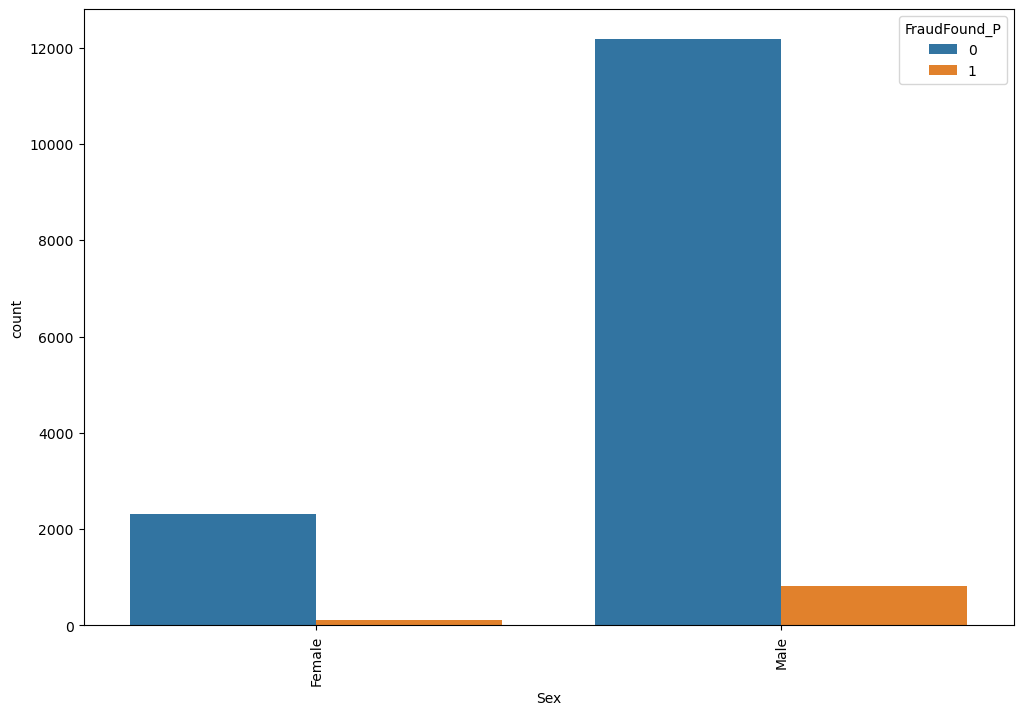

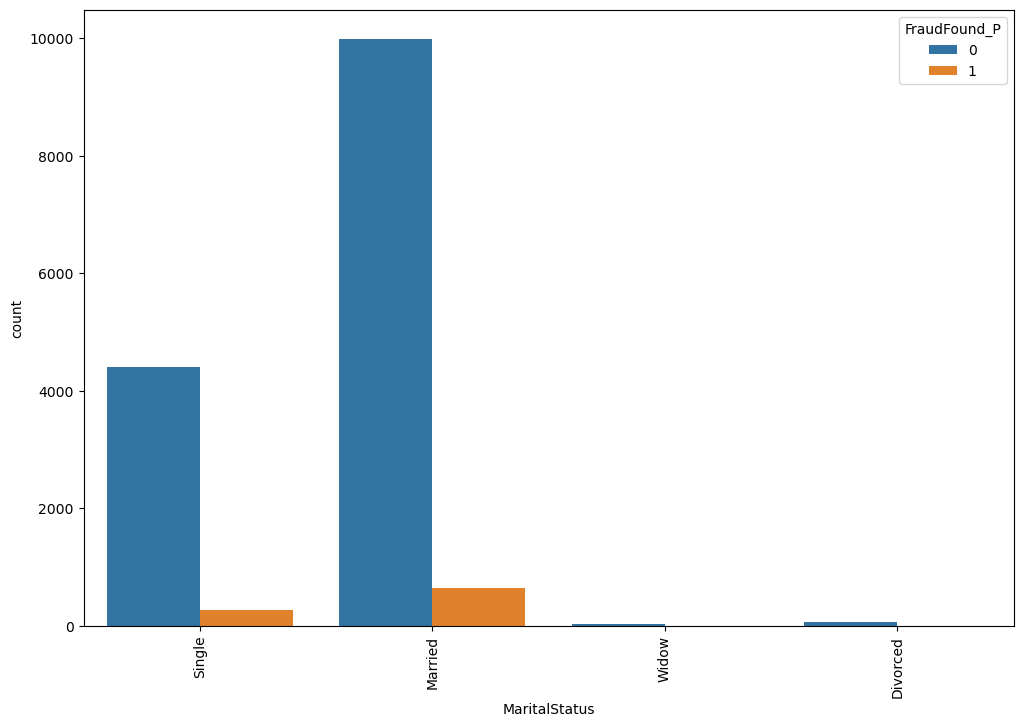

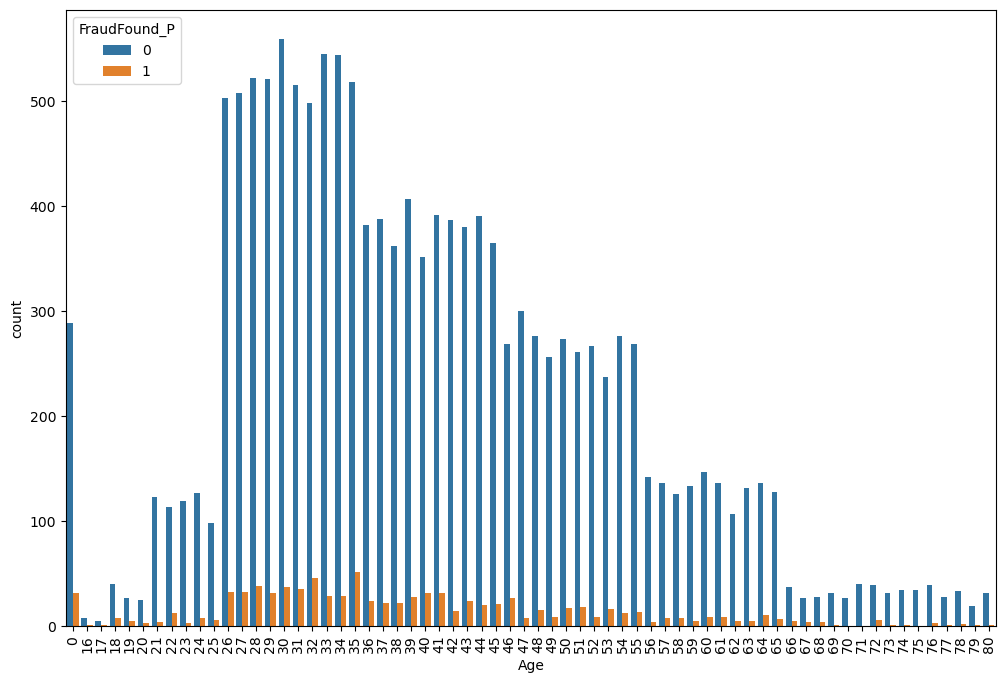

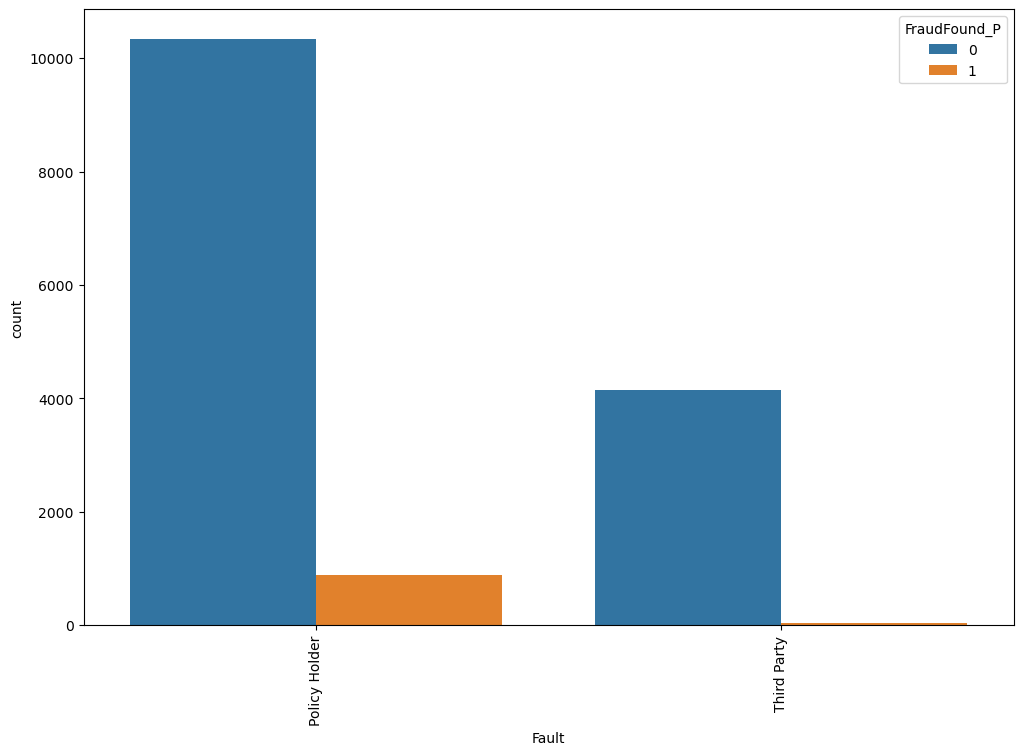

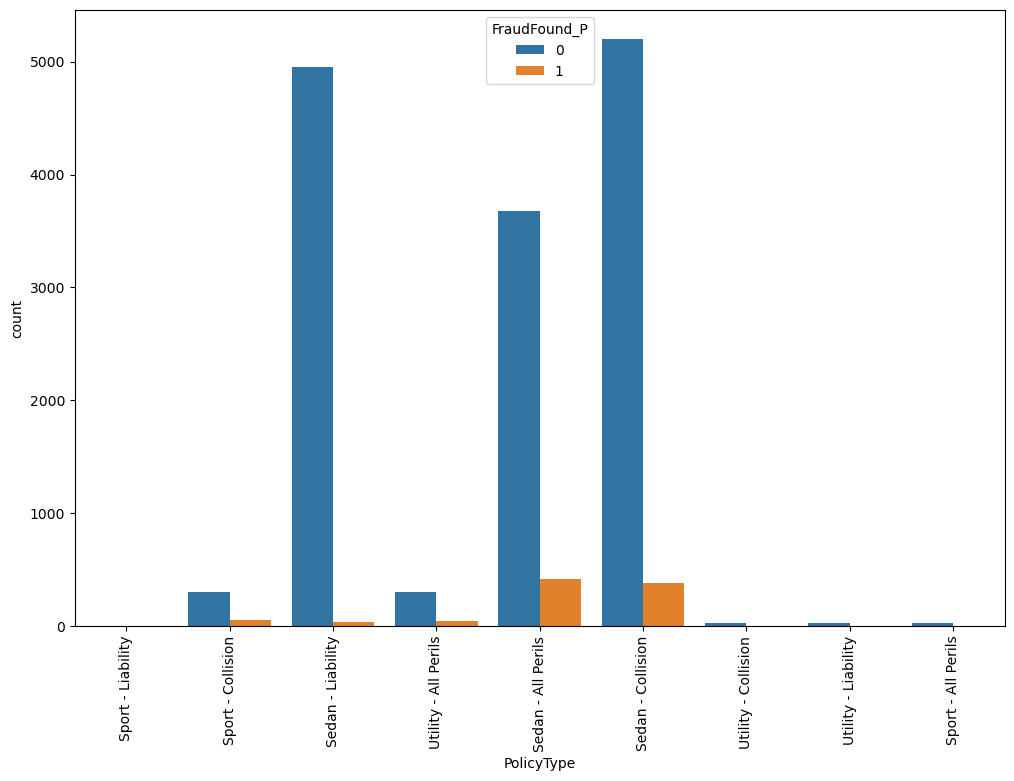

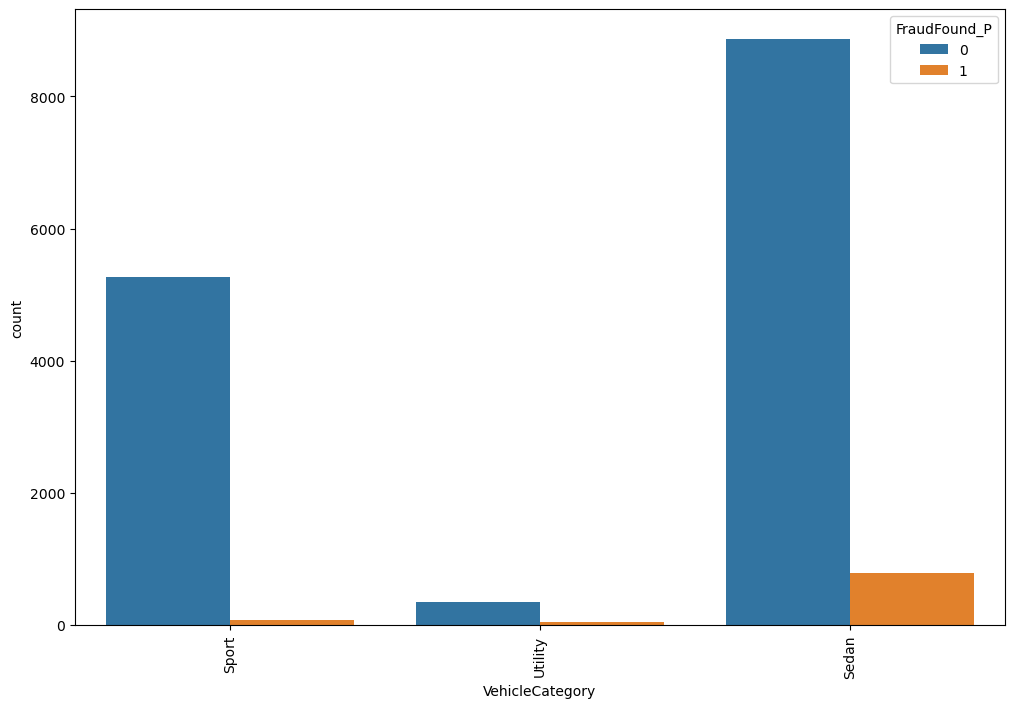

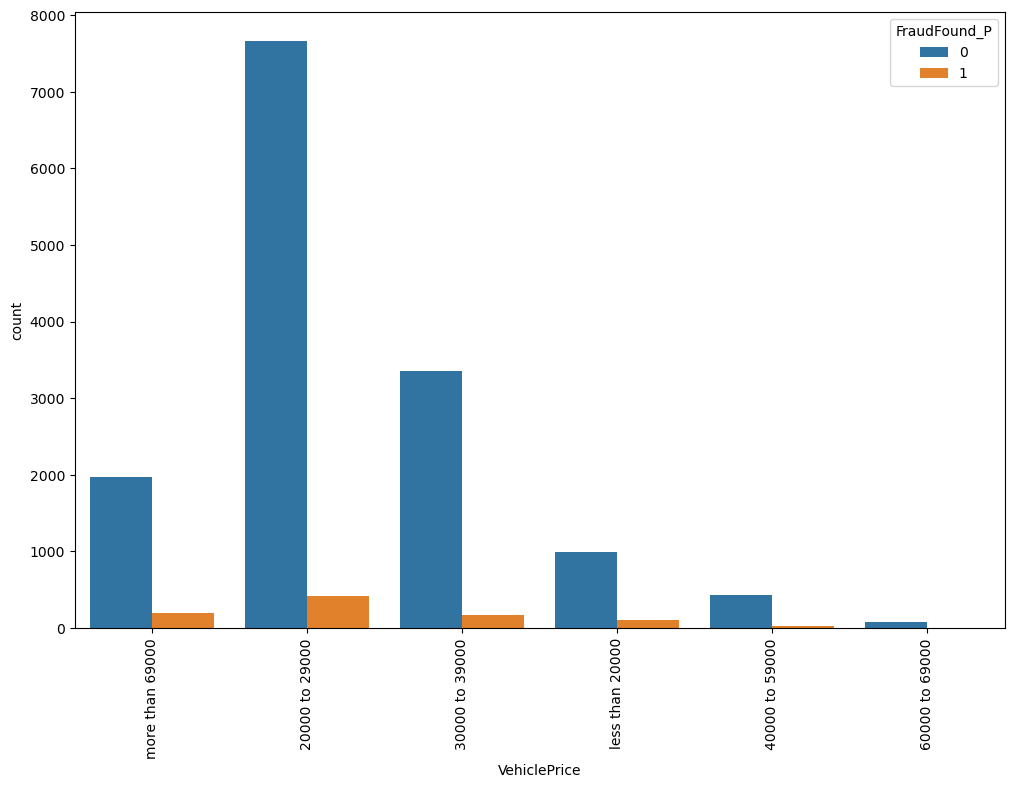

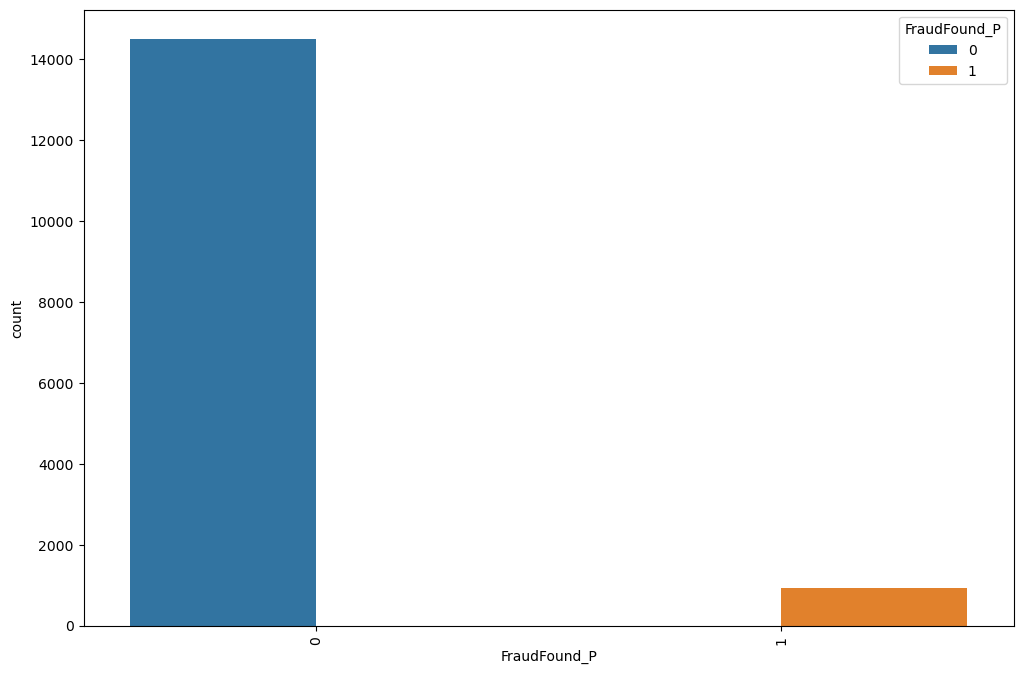

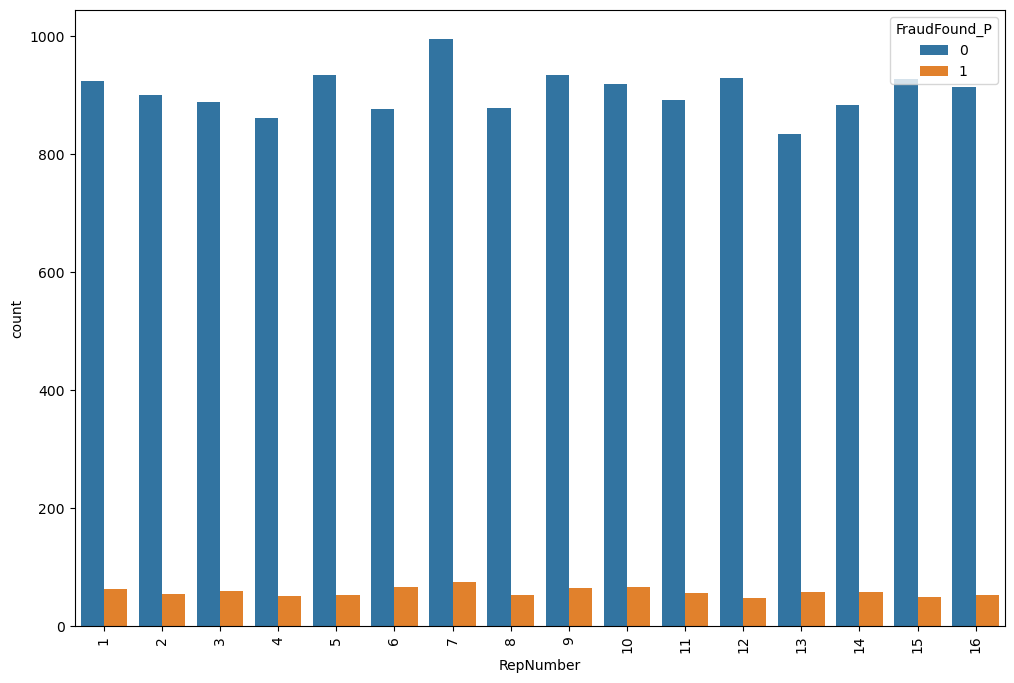

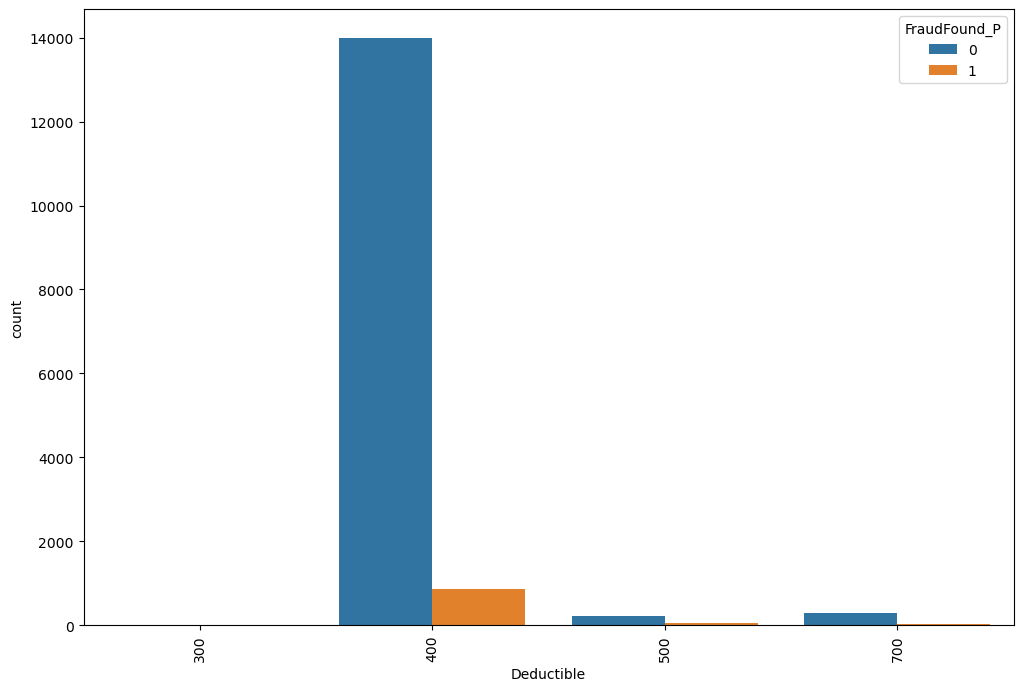

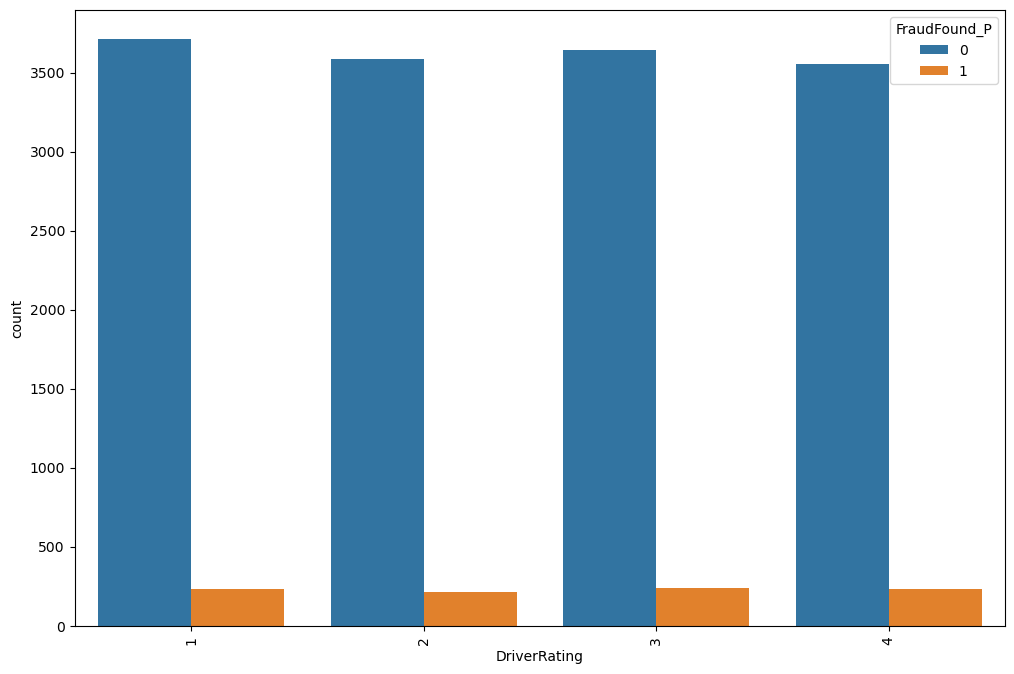

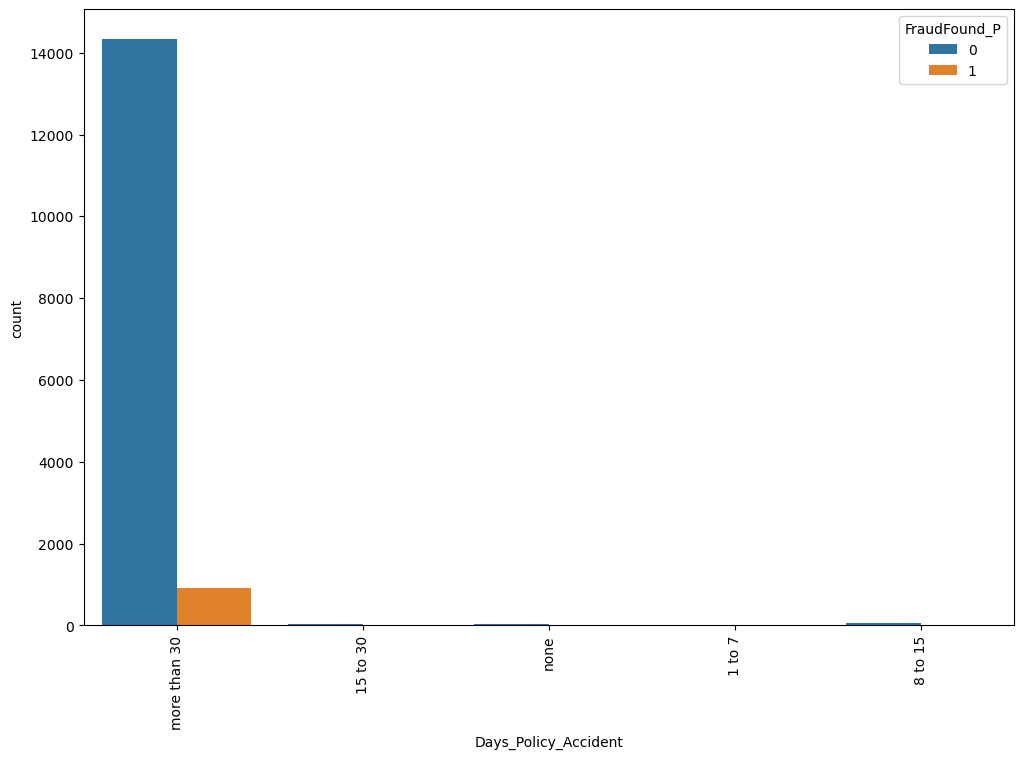

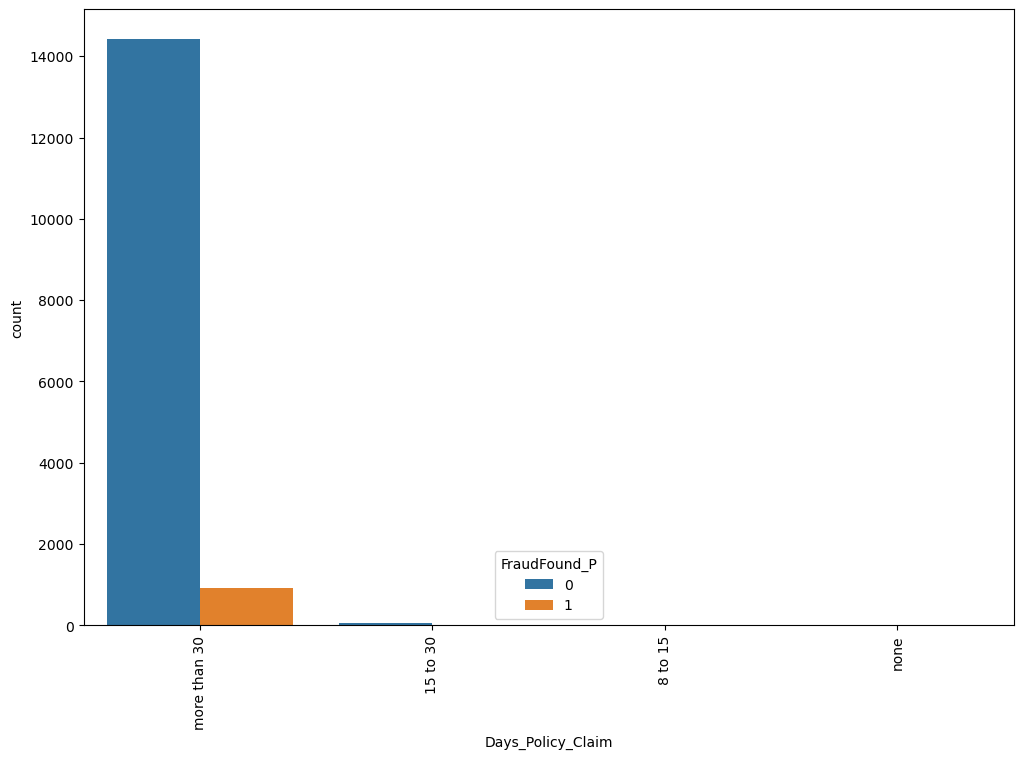

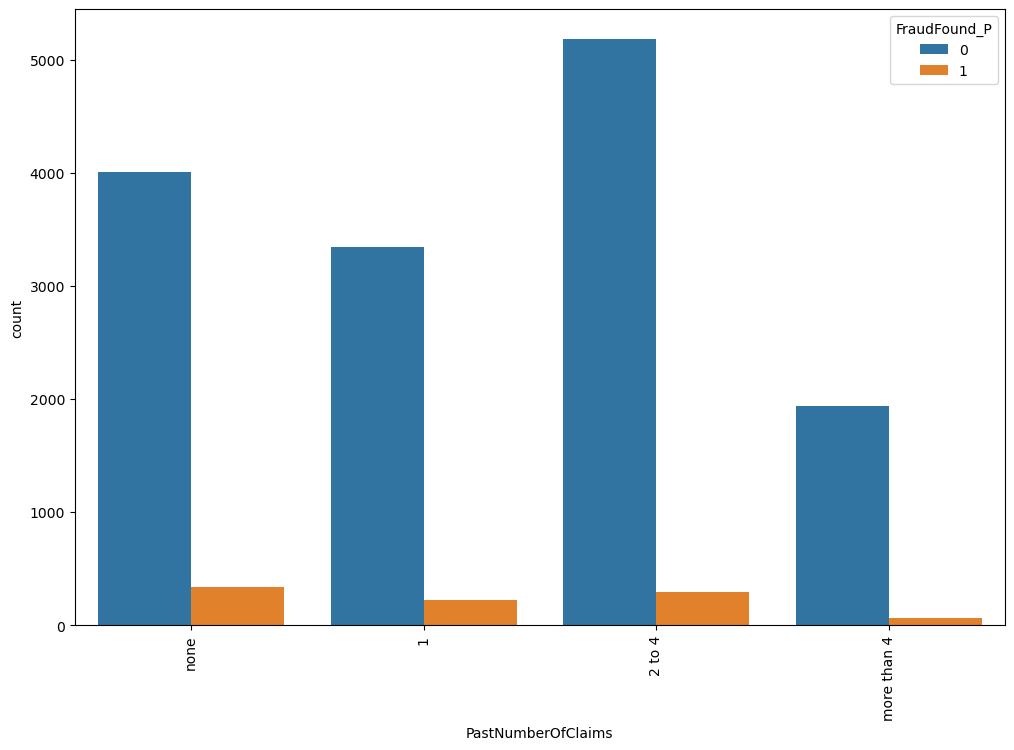

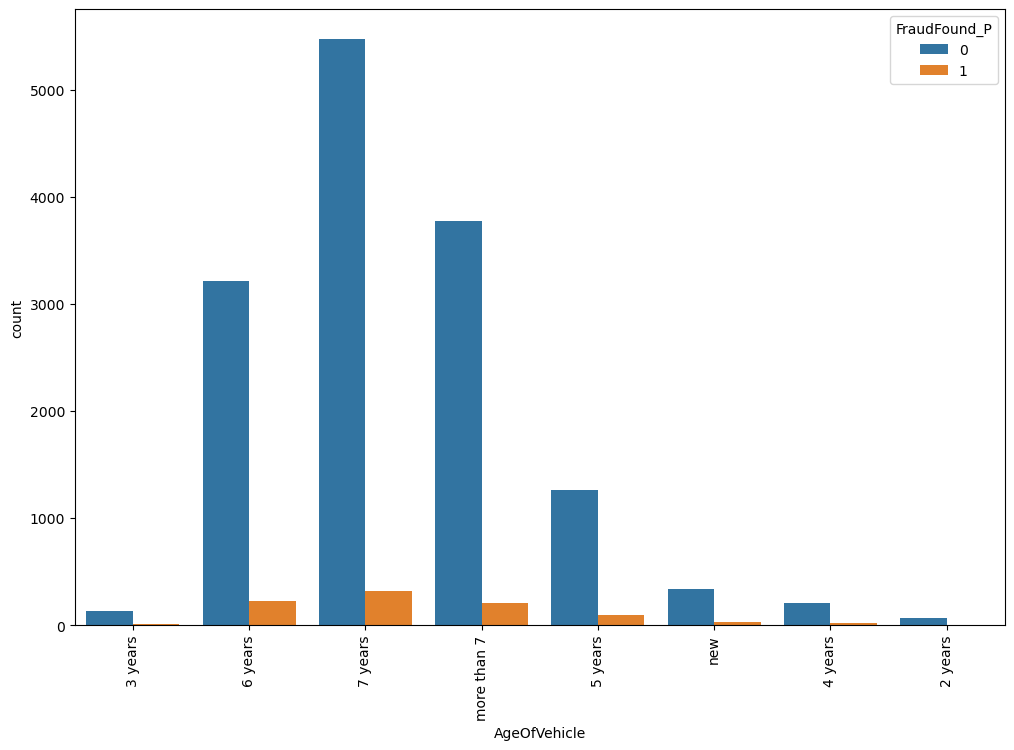

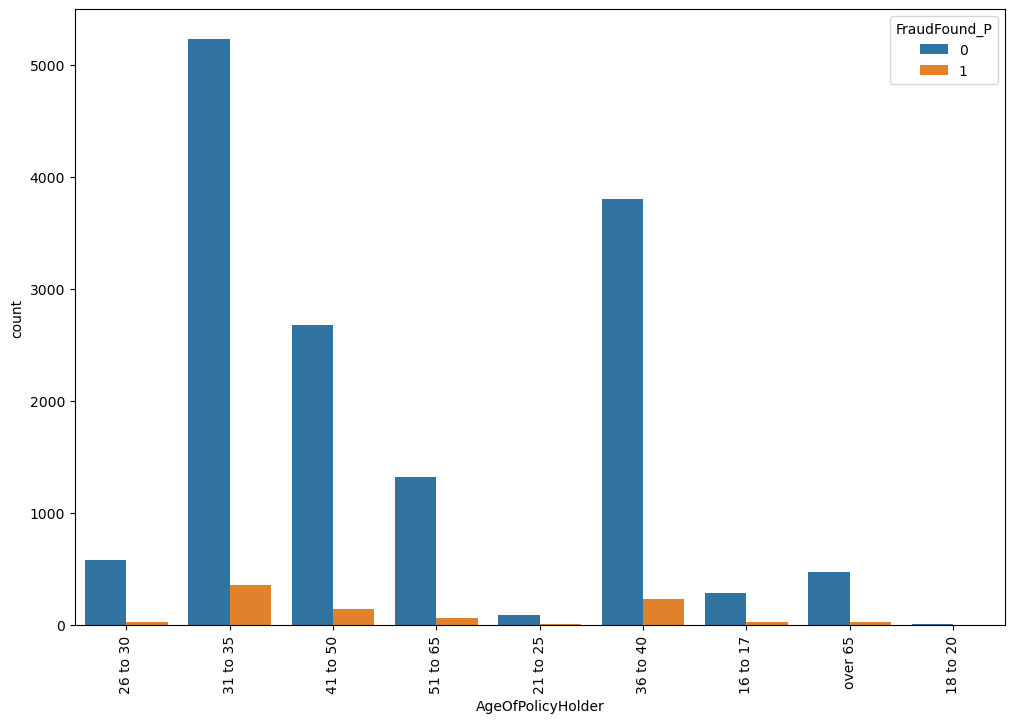

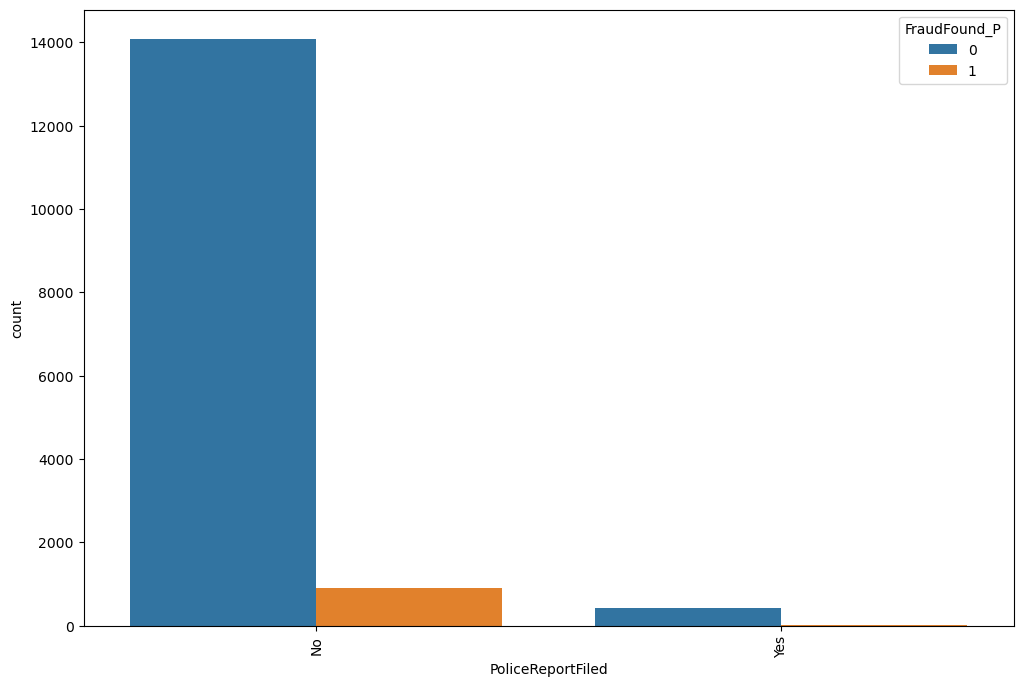

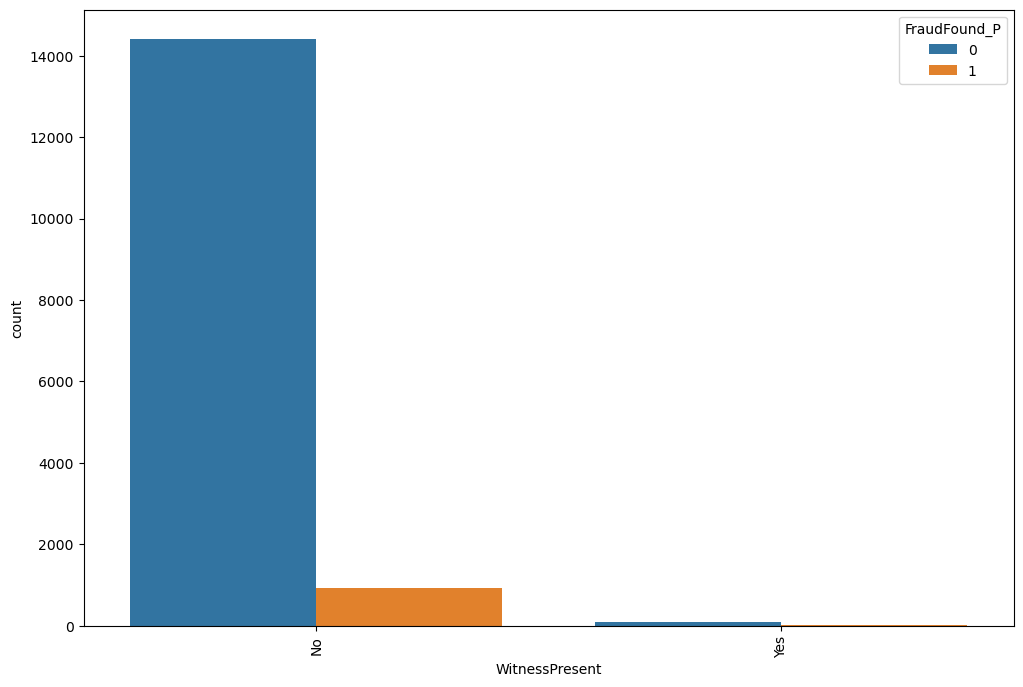

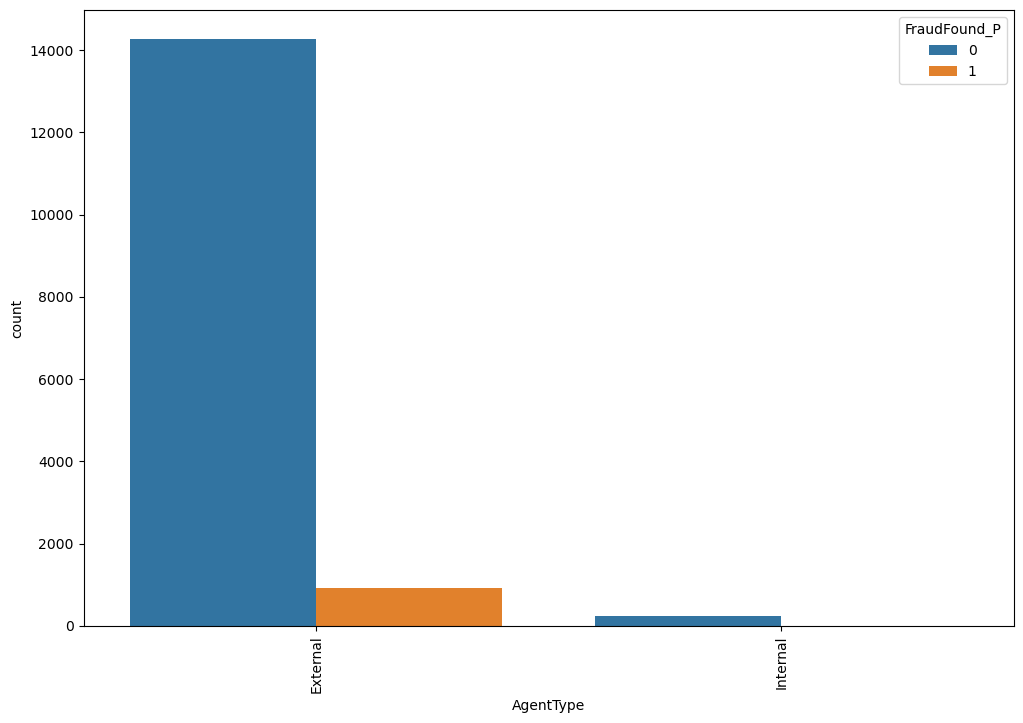

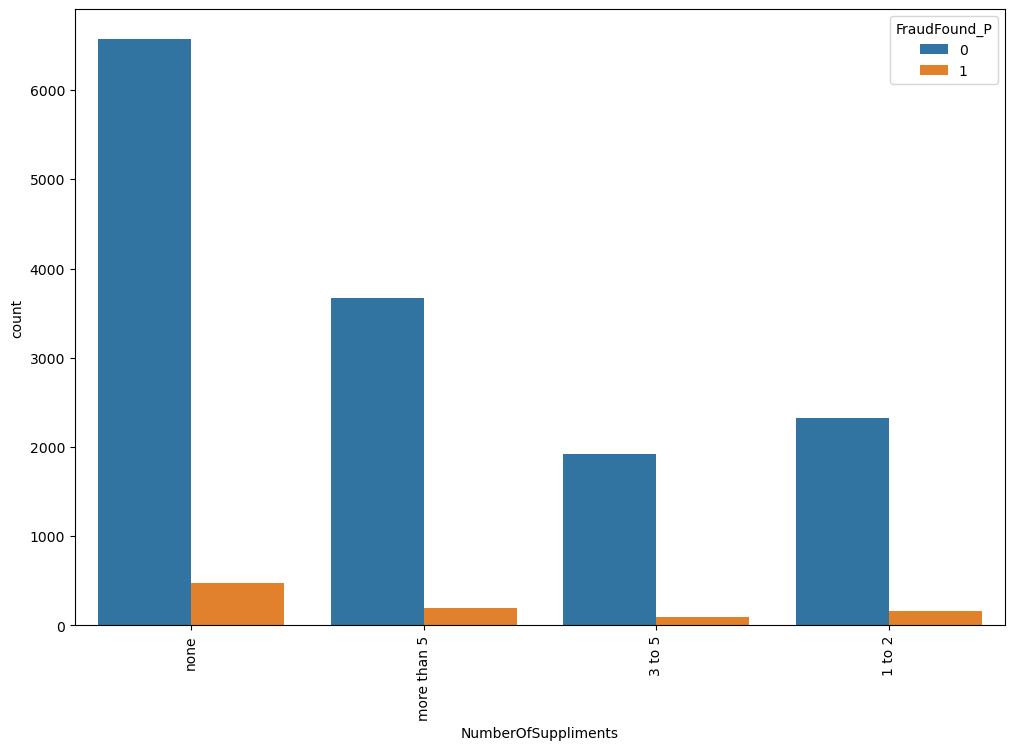

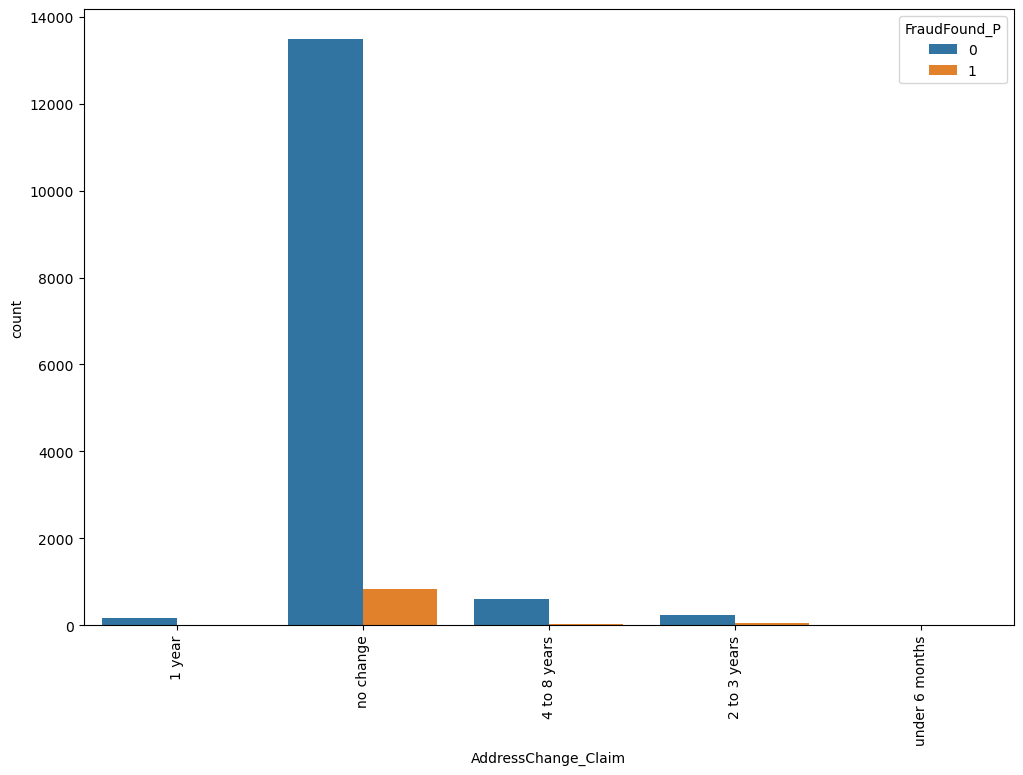

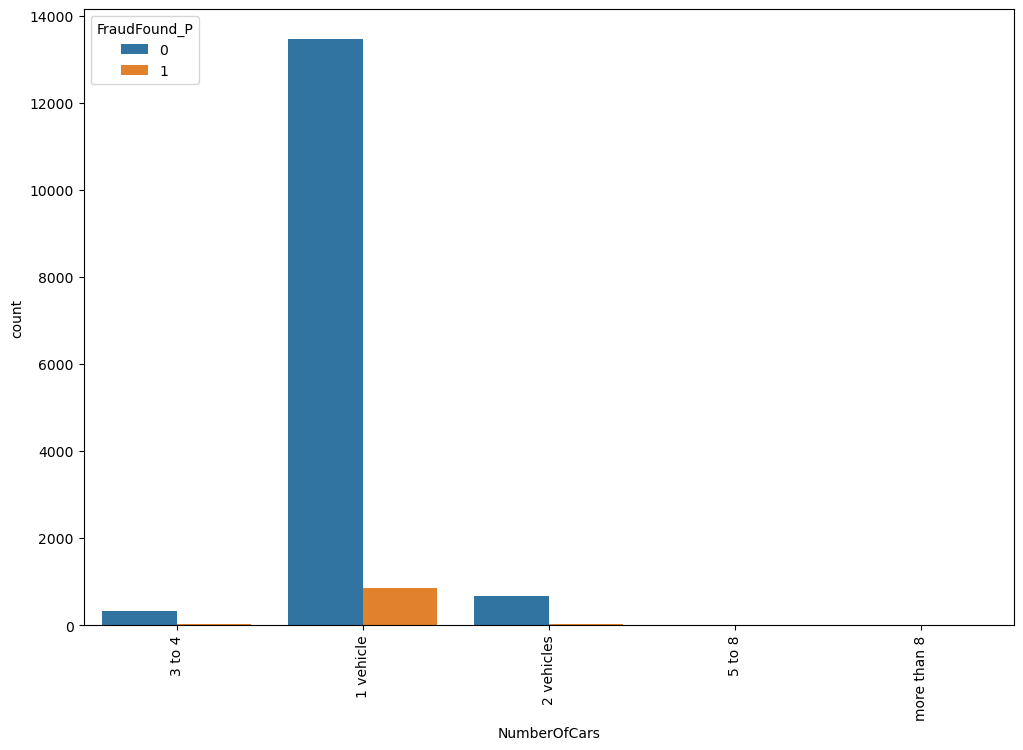

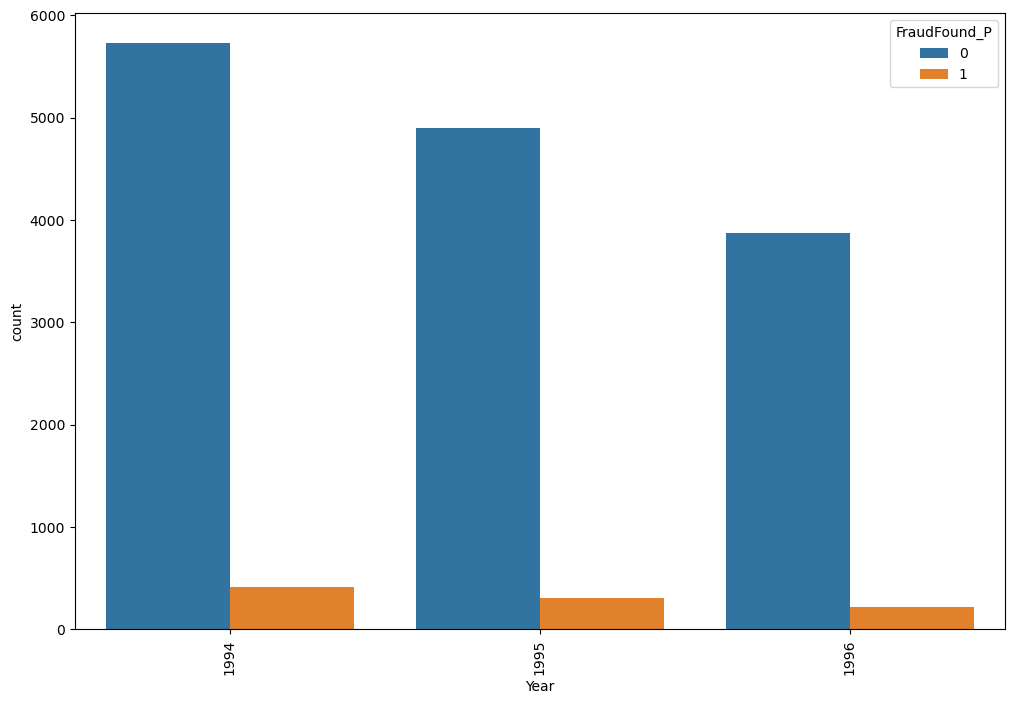

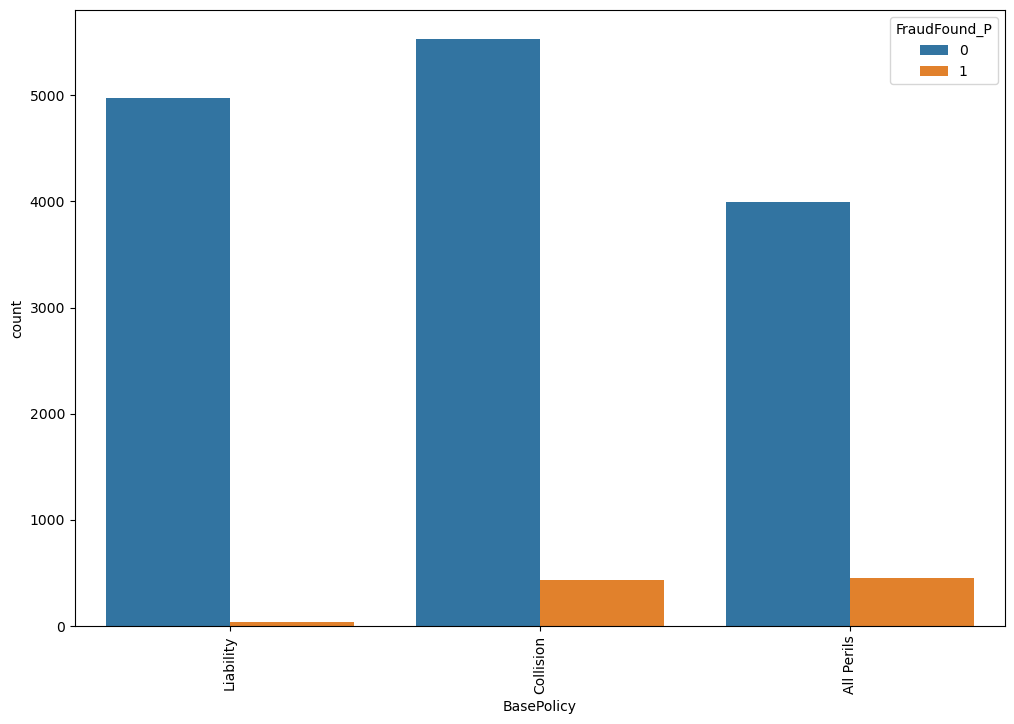

In [10]:
for i in df:
    plt.figure(figsize=(12,8))
    sns.countplot(df[i],hue=df["FraudFound_P"])
    plt.xticks(rotation = 'vertical')
    plt.show()


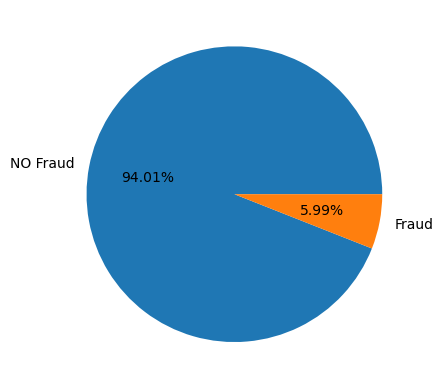

In [11]:
labels = ['NO Fraud','Fraud']
plt.pie(df['FraudFound_P'].value_counts().values, labels=labels, autopct='%1.2f%%')
plt.show()

### Primary Analysis

1. From the pie plot, we understand that this dataset is imbalanced, that means we don't have enough samples from each 

class and we will have problems to train the model, so we have to balance this dataset before training the model. We do 

this in the data preprocessing sectio

2. The amount of claims in different months does not differ so much that we can find out a special point from it

3. Top 5 Make of claims in order is:

    1. Pontiac (Highest)
    2. Toyota
    3. Honda
    4. Mazda
    5. Chevrole

4. Most accidents occur in Urban areas and the remaining occur in Rural areas.

5. Most driver are men and than women

6. Most of the frauds are in age of 26 to 45

## Step 2 : Data Pre-Processing

### Checking Null Value

In [12]:
df.isnull().sum()   # No  null values are present 

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

### There are 320 records where age is Zero.

In [13]:
print(df[df['Age']==0].shape)
df[df['Age']==0].head()

(320, 32)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,12,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,more than 69000,0,6,400,1,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,15,400,4,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability


In [14]:
df[df['PastNumberOfClaims']=='none']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,more than 69000,0,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,more than 69000,0,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Nov,3,Wednesday,Ford,Urban,Friday,Nov,3,Male,Single,32,Third Party,Sedan - Collision,Sedan,60000 to 69000,0,6,400,4,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15408,Nov,3,Thursday,Toyota,Urban,Wednesday,Nov,4,Male,Married,51,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,14,400,1,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,All Perils
15414,Nov,4,Friday,Chevrolet,Urban,Monday,Nov,4,Male,Single,58,Third Party,Sedan - Collision,Sedan,30000 to 39000,0,3,400,4,more than 30,more than 30,none,7 years,51 to 65,No,No,External,1 to 2,4 to 8 years,2 vehicles,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [15]:
df['PastNumberOfClaims'].value_counts()

2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: PastNumberOfClaims, dtype: int64

In [16]:
print(df[df['Age']==0]['AgeOfPolicyHolder'].unique())

['16 to 17']


In [17]:
df['Age'] = df['Age'].replace({0:16.5})

In [18]:
df = df.drop(['Month','DayOfWeek','MonthClaimed','RepNumber','DriverRating','Year'], axis=1)

In [19]:
df

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,Honda,Urban,Tuesday,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,3,Honda,Urban,Monday,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,5,Honda,Urban,Thursday,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,2,Toyota,Rural,Friday,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,5,Honda,Urban,Tuesday,2,Female,Single,27.0,Third Party,Sport - Collision,Sport,more than 69000,0,400,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,Toyota,Urban,Tuesday,5,Male,Married,35.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,400,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,5,Pontiac,Urban,Friday,1,Male,Married,30.0,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,400,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,5,Toyota,Rural,Friday,1,Male,Single,24.0,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,400,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,1,Toyota,Urban,Thursday,2,Female,Married,34.0,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,400,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


## Label Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [22]:
df

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,6,1,6,1,0,2,21.0,0,5,1,5,0,300,3,2,3,1,3,0,0,0,3,0,2,2
1,3,6,1,2,4,1,2,34.0,0,4,1,5,0,400,3,2,3,4,4,1,0,0,3,3,0,1
2,5,6,1,5,2,1,1,47.0,0,4,1,5,0,400,3,2,0,5,6,0,0,0,3,3,0,1
3,2,17,0,1,1,1,1,65.0,1,2,1,0,0,400,3,2,0,6,7,1,0,0,2,3,0,2
4,5,6,1,6,2,0,2,27.0,1,4,1,5,0,400,3,2,3,3,4,0,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,17,1,6,5,1,1,35.0,0,1,0,0,1,400,3,2,1,4,4,0,0,0,3,3,0,1
15416,5,13,1,1,1,1,1,30.0,0,2,1,1,0,400,3,2,2,4,4,0,0,0,2,3,2,2
15417,5,17,0,1,1,1,2,24.0,0,1,0,0,1,400,3,2,2,3,3,0,0,0,0,3,0,1
15418,1,17,1,5,2,0,1,34.0,1,0,0,0,0,400,3,2,3,0,4,0,0,0,2,3,0,0


In [23]:
x = df.drop(['FraudFound_P'], axis =1)

In [24]:
x.head()

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,5,6,1,6,1,0,2,21.0,0,5,1,5,300,3,2,3,1,3,0,0,0,3,0,2,2
1,3,6,1,2,4,1,2,34.0,0,4,1,5,400,3,2,3,4,4,1,0,0,3,3,0,1
2,5,6,1,5,2,1,1,47.0,0,4,1,5,400,3,2,0,5,6,0,0,0,3,3,0,1
3,2,17,0,1,1,1,1,65.0,1,2,1,0,400,3,2,0,6,7,1,0,0,2,3,0,2
4,5,6,1,6,2,0,2,27.0,1,4,1,5,400,3,2,3,3,4,0,0,0,3,3,0,1


In [25]:
y = df['FraudFound_P']

## Sampling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.2)

### Unbalanced Data

In [28]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

### SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= .8)
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)

In [30]:
X_resampled

,WeekOfMonth,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,1,11,1,5,3,1,2,34.000000,0,2,1,5,400,3,2,0,5,4,0,0,0,2,3,0,2
1,5,17,1,6,5,0,2,26.000000,0,1,0,0,400,3,2,0,3,4,0,0,0,3,3,0,1
2,2,6,1,2,2,1,1,38.000000,1,1,0,1,400,3,2,1,5,5,0,0,0,1,3,0,1
3,3,9,1,2,4,1,1,61.000000,1,2,1,0,400,3,2,2,6,7,0,0,0,0,3,0,2
4,3,2,1,5,3,1,1,60.000000,0,1,0,1,400,3,2,3,6,7,0,0,0,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20907,2,9,1,6,2,1,1,32.000000,0,0,0,4,400,3,2,2,4,4,0,0,0,0,2,0,0
20908,4,2,1,6,3,0,1,49.133616,0,1,0,0,400,3,2,1,5,6,0,0,0,1,3,0,1
20909,4,2,1,5,2,1,1,38.346180,0,1,0,1,400,3,2,1,4,5,0,0,0,0,3,0,1
20910,2,3,1,1,2,1,1,57.513647,0,0,0,0,400,3,2,1,5,7,0,0,0,3,3,0,0


In [31]:
y_resampled.value_counts()

0    11618
1     9294
Name: FraudFound_P, dtype: int64

### Standarization

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [33]:
train_x_scaled = scalar.fit_transform(X_resampled)

In [34]:
test_x_scaled = scalar.transform(test_x)

### Model Building

In [35]:
print("Logistic Regression")
print("_________________________________")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x_scaled,y_resampled)
pred = logreg.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print("f1_score : ",f1_score(test_y,pred))
print("Precision :",precision_score(test_y,pred))
print()
print()


print(" Decision Tree")
print("_________________________________")
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x_scaled,y_resampled)
pred = dt.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print("f1_score : ",f1_score(test_y,pred))
print("Precision :",precision_score(test_y,pred))
print()
print()


print("Random Forest")
print("_________________________________")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x_scaled,y_resampled)
pred = rf.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print("f1_score : ",f1_score(test_y,pred))
print("Precision :",precision_score(test_y,pred))
print()


Logistic Regression
_________________________________

[[2286  593]
 [ 104  101]]

Accuracy =  77.39948119325551
f1_score :  0.22469410456062291
Precision : 0.14553314121037464


 Decision Tree
_________________________________

[[2574  305]
 [ 142   63]]

Accuracy =  85.50583657587549
f1_score :  0.21989528795811522
Precision : 0.17119565217391305


Random Forest
_________________________________

[[2736  143]
 [ 161   44]]

Accuracy =  90.14267185473412
f1_score :  0.22448979591836732
Precision : 0.23529411764705882



In [36]:
rf.feature_importances_

array([0.05729604, 0.06786594, 0.02335066, 0.05562707, 0.04723924,
       0.01320694, 0.02410621, 0.10333126, 0.12021394, 0.0605556 ,
       0.03966707, 0.03594567, 0.02143949, 0.00219742, 0.00187023,
       0.04641941, 0.04707135, 0.03242042, 0.00637197, 0.00072347,
       0.00166639, 0.03655757, 0.02486452, 0.01083884, 0.11915326])

In [37]:
feat_imp = pd.DataFrame()
feat_imp['features'] = train_x.columns
feat_imp['Imp'] = rf.feature_importances_

In [38]:
feat_imp.sort_values('Imp',ascending=False)

,features,Imp
8,Fault,0.120214
24,BasePolicy,0.119153
7,Age,0.103331
1,Make,0.067866
9,PolicyType,0.060556
0,WeekOfMonth,0.057296
3,DayOfWeekClaimed,0.055627
4,WeekOfMonthClaimed,0.047239
16,AgeOfVehicle,0.047071
15,PastNumberOfClaims,0.046419


## Top Features

In [39]:
feat_imp[feat_imp.Imp > 0.03]

,features,Imp
0,WeekOfMonth,0.057296
1,Make,0.067866
3,DayOfWeekClaimed,0.055627
4,WeekOfMonthClaimed,0.047239
7,Age,0.103331
8,Fault,0.120214
9,PolicyType,0.060556
10,VehicleCategory,0.039667
11,VehiclePrice,0.035946
15,PastNumberOfClaims,0.046419


### Now Model is building on important features based on Random Forest

In [40]:
feat_imp = feat_imp[feat_imp.Imp > 0.03]

In [41]:
f = df.loc[:,list(feat_imp['features'])]

In [42]:
f

,WeekOfMonth,Make,DayOfWeekClaimed,WeekOfMonthClaimed,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,BasePolicy
0,5,6,6,1,21.0,0,5,1,5,3,1,3,3,2
1,3,6,2,4,34.0,0,4,1,5,3,4,4,3,1
2,5,6,5,2,47.0,0,4,1,5,0,5,6,3,1
3,2,17,1,1,65.0,1,2,1,0,0,6,7,2,2
4,5,6,6,2,27.0,1,4,1,5,3,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,17,6,5,35.0,0,1,0,0,1,4,4,3,1
15416,5,13,1,1,30.0,0,2,1,1,2,4,4,2,2
15417,5,17,1,1,24.0,0,1,0,0,2,3,3,0,1
15418,1,17,5,2,34.0,1,0,0,0,3,0,4,2,0


### Arrangement for HTML Page

In [43]:
x = pd.concat((pd.DataFrame(df['Age']),f.drop(['Age'],axis=1)),axis = 1)

In [44]:
x 

,Age,WeekOfMonth,Make,DayOfWeekClaimed,WeekOfMonthClaimed,Fault,PolicyType,VehicleCategory,VehiclePrice,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,BasePolicy
0,21.0,5,6,6,1,0,5,1,5,3,1,3,3,2
1,34.0,3,6,2,4,0,4,1,5,3,4,4,3,1
2,47.0,5,6,5,2,0,4,1,5,0,5,6,3,1
3,65.0,2,17,1,1,1,2,1,0,0,6,7,2,2
4,27.0,5,6,6,2,1,4,1,5,3,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,35.0,4,17,6,5,0,1,0,0,1,4,4,3,1
15416,30.0,5,13,1,1,0,2,1,1,2,4,4,2,2
15417,24.0,5,17,1,1,0,1,0,0,2,3,3,0,1
15418,34.0,1,17,5,2,1,0,0,0,3,0,4,2,0


## Sampling

In [45]:
y =  df['FraudFound_P']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

## Unbalanced data

In [48]:
train_y.value_counts()

0    11592
1      744
Name: FraudFound_P, dtype: int64

### SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= .8)
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)

In [50]:
y_resampled.value_counts()

0    11592
1     9273
Name: FraudFound_P, dtype: int64

### Standarization¶

In [51]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [52]:
train_x_scaled = scalar.fit_transform(X_resampled)

In [53]:
test_x_scaled = scalar.transform(test_x)

## Model Building

### 1.Logistic Regression

In [54]:
print("Logistic Regression")
print("___________________________Prediction On Test__________________________")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x_scaled,y_resampled)
pred_lr = logreg.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred_lr)
print(tab)
print()
Accuracy_lg = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_lg)
print()
print(classification_report(test_y,pred_lr))
print()
print()
print("___________________________Prediction On Train__________________________")

print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x_scaled,y_resampled)
pred = logreg.predict(train_x_scaled)
tab = confusion_matrix(y_resampled,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
print(classification_report(y_resampled,pred))
print()
print()

Logistic Regression
___________________________Prediction On Test__________________________

[[2156  749]
 [  68  111]]

Accuracy =  73.50843060959792

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      2905
           1       0.13      0.62      0.21       179

    accuracy                           0.74      3084
   macro avg       0.55      0.68      0.53      3084
weighted avg       0.92      0.74      0.80      3084



___________________________Prediction On Train__________________________

[[8671 2921]
 [1224 8049]]

Accuracy =  80.1341960220465

              precision    recall  f1-score   support

           0       0.88      0.75      0.81     11592
           1       0.73      0.87      0.80      9273

    accuracy                           0.80     20865
   macro avg       0.81      0.81      0.80     20865
weighted avg       0.81      0.80      0.80     20865





# Hyperparameter Tuning For Logistic Regression

In [55]:
from sklearn.model_selection import GridSearchCV

In [89]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=9.921,dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1122, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Parameter_grid = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[0.5,1,2,3,4] ,  
                  'solver':['lbfgs', 'liblinear', 'saga']}

lr_grid = GridSearchCV(estimator = logreg, param_grid = Parameter_grid,cv = 5)
lr_grid.fit(train_x_scaled,y_resampled)
lr_grid.best_params_

{'C': 2, 'penalty': 'l1', 'solver': 'liblinear'}

In [90]:
pred_grd_lr = lr_grid.predict(test_x_scaled)

In [91]:
print("_________________Prediction on Test____________")
print()
print("Confusion Matrix")
print()
print(confusion_matrix(test_y,pred_grd_lr))
tab = confusion_matrix(test_y,pred_grd_lr) 
Accuracy_grd_lg = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_grd_lg)
print()
print(classification_report(test_y,pred_grd_lr))


print("_________________Prediction on Train____________")
print()
pred = lr_grid.predict(train_x_scaled)
print("Confusion Matrix")
print()
print(confusion_matrix(y_resampled,pred))
print()
print(classification_report(y_resampled,pred))


_________________Prediction on Test____________

Confusion Matrix

[[2156  749]
 [  68  111]]
Accuracy =  73.50843060959792

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      2905
           1       0.13      0.62      0.21       179

    accuracy                           0.74      3084
   macro avg       0.55      0.68      0.53      3084
weighted avg       0.92      0.74      0.80      3084

_________________Prediction on Train____________

Confusion Matrix

[[8669 2923]
 [1221 8052]]

              precision    recall  f1-score   support

           0       0.88      0.75      0.81     11592
           1       0.73      0.87      0.80      9273

    accuracy                           0.80     20865
   macro avg       0.81      0.81      0.80     20865
weighted avg       0.81      0.80      0.80     20865



### 4.Decision Tree

In [59]:
print(" Decision Tree")
print("________________________________Prediction on Test___________________________")
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x_scaled,y_resampled)
pred_dt = dt.predict(test_x_scaled)
tab = confusion_matrix(test_y,pred_dt)
print(tab)
print()
Accuracy_dt = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_dt)
print()
print(classification_report(test_y,pred_dt))
print()

print("____________________________Prediction on Train___________________________")
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x_scaled,y_resampled)
pred = dt.predict(train_x_scaled)
tab = confusion_matrix(y_resampled,pred)
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
print(classification_report(y_resampled,pred))
print()
print()

 Decision Tree
________________________________Prediction on Test___________________________

[[2575  330]
 [ 144   35]]

Accuracy =  84.63035019455253

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2905
           1       0.10      0.20      0.13       179

    accuracy                           0.85      3084
   macro avg       0.52      0.54      0.52      3084
weighted avg       0.90      0.85      0.87      3084


____________________________Prediction on Train___________________________

[[11579    13]
 [    6  9267]]

Accuracy =  99.90893841361131

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11592
           1       1.00      1.00      1.00      9273

    accuracy                           1.00     20865
   macro avg       1.00      1.00      1.00     20865
weighted avg       1.00      1.00      1.00     20865





# Hyperparameter Tuning For Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

Parameter_grid = {"max_depth":[3,8,10],
                  "criterion":['gini', 'entropy'], 'min_samples_split' :[125,150,175]}


In [61]:
from sklearn.model_selection import GridSearchCV 
dt_grid = GridSearchCV(estimator = dt, param_grid = Parameter_grid,cv = 5)
dt_grid.fit(train_x_scaled,y_resampled)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 8, 10],
                         'min_samples_split': [125, 150, 175]})

In [62]:
dt_grid.best_params_  

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 125}

In [63]:
pred_grd_dt = dt_grid.predict(test_x_scaled)

In [64]:
print("_________________Prediction on Test____________")
print()
print("Confusion Matrix")
print()
print(confusion_matrix(test_y,pred_grd_dt))
tab = confusion_matrix(test_y,pred_grd_dt) 
Accuracy_grd_dt = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_grd_dt)
print()
print(classification_report(test_y,pred_grd_dt))

print("_________________Prediction on Train____________")
print()
pred = dt_grid.predict(train_x_scaled)
print("Confusion Matrix")
print()
print(confusion_matrix(y_resampled,pred))
print()
print(classification_report(y_resampled,pred))


_________________Prediction on Test____________

Confusion Matrix

[[2289  616]
 [  89   90]]
Accuracy =  77.14007782101167

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2905
           1       0.13      0.50      0.20       179

    accuracy                           0.77      3084
   macro avg       0.55      0.65      0.53      3084
weighted avg       0.91      0.77      0.83      3084

_________________Prediction on Train____________

Confusion Matrix

[[9251 2341]
 [ 891 8382]]

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     11592
           1       0.78      0.90      0.84      9273

    accuracy                           0.85     20865
   macro avg       0.85      0.85      0.84     20865
weighted avg       0.85      0.85      0.85     20865



### 3. Random Forest

In [65]:
print("Random Forest")
print("_________________________________Prediction on Test___________________")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x_scaled,y_resampled)
pred_rf = rf.predict(test_x_scaled)
tab_rf = confusion_matrix(test_y,pred_rf)
print(tab)
print()
Accuracy_rf = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_rf )
print()
print(classification_report(test_y,pred_rf))
print()
print("______________________Prediction on Train________________")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x_scaled,y_resampled)
pred = rf.predict(train_x_scaled)
tab = confusion_matrix(y_resampled,pred)
print(tab)
print()
print(classification_report(y_resampled,pred))
print()
print()


Random Forest
_________________________________Prediction on Test___________________

[[2289  616]
 [  89   90]]

Accuracy =  77.14007782101167

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2905
           1       0.13      0.16      0.15       179

    accuracy                           0.89      3084
   macro avg       0.54      0.55      0.54      3084
weighted avg       0.90      0.89      0.90      3084


______________________Prediction on Train________________

[[11578    14]
 [    5  9268]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11592
           1       1.00      1.00      1.00      9273

    accuracy                           1.00     20865
   macro avg       1.00      1.00      1.00     20865
weighted avg       1.00      1.00      1.00     20865





# Hyperparameter Tuning For Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Parameter_grid = {"n_estimators" : [20,60,120],
                  "criterion":['gini', 'entropy'], "min_samples_split" : [28,35] }

rf_grid = GridSearchCV(estimator = rf, param_grid = Parameter_grid,cv = 5)
rf_grid.fit(train_x_scaled,y_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [28, 35],
                         'n_estimators': [20, 60, 120]})

In [67]:
rf_grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 28, 'n_estimators': 120}

In [68]:
pred_grd_rf = rf_grid.predict(test_x_scaled)

In [70]:
print("_________________Prediction on Test____________")
print()
print("Confusion Matrix")
print()
print(confusion_matrix(test_y,pred_grd_rf))
print()
tab = confusion_matrix(test_y,pred_grd_rf) 
Accuracy_grd_rf = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy_grd_rf)
print(classification_report(test_y,pred_grd_rf))
print()
print("_________________Prediction on Train____________")
print()
pred = rf_grid.predict(train_x_scaled)
print("Confusion Matrix")
print()
print(confusion_matrix(y_resampled,pred))
print()
print(classification_report(y_resampled,pred))

_________________Prediction on Test____________

Confusion Matrix

[[2584  321]
 [ 123   56]]

Accuracy =  85.60311284046692
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2905
           1       0.15      0.31      0.20       179

    accuracy                           0.86      3084
   macro avg       0.55      0.60      0.56      3084
weighted avg       0.91      0.86      0.88      3084


_________________Prediction on Train____________

Confusion Matrix

[[10698   894]
 [  437  8836]]

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     11592
           1       0.91      0.95      0.93      9273

    accuracy                           0.94     20865
   macro avg       0.93      0.94      0.94     20865
weighted avg       0.94      0.94      0.94     20865



## Support Vector Classifier

In [71]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x_scaled,y_resampled)
svc_pred = svc.predict(test_x_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,svc_pred)

0.8041504539559015

In [72]:
tab = confusion_matrix(test_y,svc_pred)
tab

array([[2401,  504],
       [ 100,   79]], dtype=int64)

In [73]:
Accuracy_svc = tab.diagonal().sum()*100/tab.sum()
Accuracy_svc

80.41504539559014

In [74]:
print(classification_report(test_y,svc_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2905
           1       0.14      0.44      0.21       179

    accuracy                           0.80      3084
   macro avg       0.55      0.63      0.55      3084
weighted avg       0.91      0.80      0.85      3084



## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_x_scaled,y_resampled)
nb_pred = nb.predict(test_x_scaled)
tab = confusion_matrix(test_y,nb_pred)
print(tab)
print()
Accuracy_nb = tab.diagonal().sum()*100/tab.sum()
print("Accuracy",Accuracy_nb)
print(classification_report(test_y, nb_pred))


[[1811 1094]
 [  26  153]]

Accuracy 63.68352788586252
              precision    recall  f1-score   support

           0       0.99      0.62      0.76      2905
           1       0.12      0.85      0.21       179

    accuracy                           0.64      3084
   macro avg       0.55      0.74      0.49      3084
weighted avg       0.94      0.64      0.73      3084



### K Nearest Neighbours Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [78]:
 knn.fit(train_x_scaled,y_resampled)

KNeighborsClassifier(n_neighbors=7)

In [79]:
pred_knn = knn.predict(test_x_scaled)


In [80]:
tab = confusion_matrix(test_y,pred_knn)
tab

array([[2363,  542],
       [  98,   81]], dtype=int64)

In [81]:
acc = tab.diagonal().sum() * 100 / tab.sum()
acc

79.24773022049287

In [82]:
print(classification_report(test_y,pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2905
           1       0.13      0.45      0.20       179

    accuracy                           0.79      3084
   macro avg       0.55      0.63      0.54      3084
weighted avg       0.91      0.79      0.84      3084



In [86]:
from sklearn.metrics import recall_score, precision_score

In [87]:
data={ "Algorithm": ["Logistics Regression", "Decision Tree", "Random Forest","Support Vector Classifier"],
      "Accuracy": [Accuracy_lg, Accuracy_dt, Accuracy_rf,Accuracy_svc],
      "Recall Score":[recall_score(test_y, pred_lr), recall_score(test_y, pred_dt), recall_score(test_y,svc_pred),recall_score(test_y,svc_pred)],
      "Precision Score":[precision_score(test_y, pred_lr), precision_score(test_y, pred_dt), precision_score(test_y, pred_rf),precision_score(test_y,svc_pred)]
    }

algo_metrics= pd.DataFrame(data)
algo_metrics

,Algorithm,Accuracy,Recall Score,Precision Score
0,Logistics Regression,73.508431,0.620112,0.129070
1,Decision Tree,84.630350,0.195531,0.095890
2,Random Forest,77.140078,0.441341,0.133641
3,Support Vector Classifier,80.415045,0.441341,0.135506


In [92]:
data={ "Algorithm": ["Logistics Regression", "Decision Tree", "Random Forest"],
      "Accuracy": [Accuracy_grd_lg, Accuracy_grd_dt, Accuracy_grd_rf],
      "Recall Score":[recall_score(test_y, pred_grd_lr), recall_score(test_y, pred_grd_dt), recall_score(test_y, pred_grd_rf)],
      "Precision Score":[precision_score(test_y, pred_grd_lr), precision_score(test_y, pred_grd_dt), precision_score(test_y, pred_grd_rf)]
    }

algo_metrics_hyp= pd.DataFrame(data)
algo_metrics_hyp

,Algorithm,Accuracy,Recall Score,Precision Score
0,Logistics Regression,73.508431,0.620112,0.129070
1,Decision Tree,77.140078,0.502793,0.127479
2,Random Forest,85.603113,0.312849,0.148541


### Pickle

In [ ]:
import pickle

pickle.dump(lr_grid, open(r"C:\Users\MR.GODHADE\Desktop\cloud1\build.pkl",'wb')) 

In [ ]:
with open(r"C:\Users\MR.GODHADE\Desktop\Insurance Fraud\build.pkl", 'rb') as f:
    Insurance_Fraud = pickle.load(f)

In [ ]:
test_pickle = Insurance_Fraud.predict(test_x_scaled)
test_pickle